In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # Import Support Vector Classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# This will load the cancer dataset
from sklearn import datasets
cancer = datasets.load_breast_cancer()
#This is the data we will use for this assignment
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/diabetes.csv'
diabetes = pd.read_csv(url)
print(diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
#Problem 1
X1 = diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y1 = diabetes['Outcome']


STDScaler = StandardScaler()
X1scale = STDScaler.fit_transform(X1)
TrainX1, TestX1, TrainY1, TestY1 = train_test_split(X1scale, Y1, train_size = 0.8, test_size=0.2, random_state=100)

In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(TrainX1.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(TrainX1, TrainY1, epochs=100, batch_size=32, validation_split=0.2, verbose=0 )

FCNN_pred_prob = model.predict(TestX1)
FCNN_pred_Y = (FCNN_pred_prob > 0.5).astype(int)

LR_model = LogisticRegression(random_state=100)
LR_model.fit(TrainX1, TrainY1)
LR_pred_Y = LR_model.predict(TestX1)

SVM_model = SVC(kernel='rbf', random_state=100)
SVM_model.fit(TrainX1, TrainY1)
SVM_pred_Y = SVM_model.predict(TestX1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [ ]:
def report_metrics(model_name, true_Y, pred_Y):
    """Calculates and prints performance metrics."""
    acc = accuracy_score(true_Y, pred_Y)
    prec = precision_score(true_Y, pred_Y, zero_division=0)
    rec = recall_score(true_Y, pred_Y, zero_division=0)
    f1 = f1_score(true_Y, pred_Y, zero_division=0)

    print(f"\nModel: {model_name}")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall:    {rec:.4f}")
    print(f"  F1-Score:  {f1:.4f}")

    return [model_name, acc, prec, rec, f1]


Model: FCNN
  Accuracy:  0.7273
  Precision: 0.6078
  Recall:    0.5849
  F1-Score:  0.5962

Model: Logistic Regression
  Accuracy:  0.7338
  Precision: 0.6429
  Recall:    0.5094
  F1-Score:  0.5684

Model: Support Vector Machine (SVM)
  Accuracy:  0.7078
  Precision: 0.5909
  Recall:    0.4906
  F1-Score:  0.5361


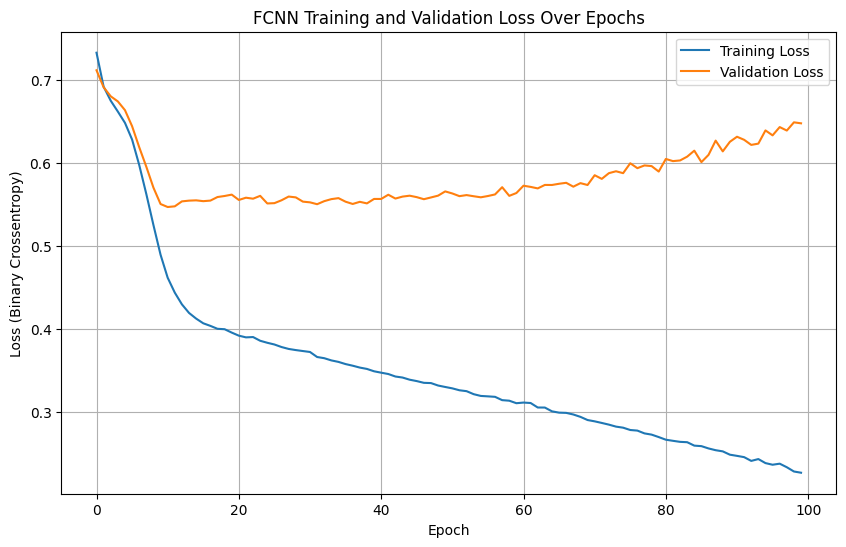

In [ ]:
metrics_list = []
metrics_list.append(report_metrics("FCNN", TestY1, FCNN_pred_Y))
metrics_list.append(report_metrics("Logistic Regression", TestY1, LR_pred_Y))
metrics_list.append(report_metrics("Support Vector Machine (SVM)", TestY1, SVM_pred_Y))

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('FCNN Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (Binary Crossentropy)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Problem 2
X = cancer.data
Y = cancer.target
m = len(Y)
TrainX1, TestX1, TrainY1, TestY1 = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

model = Sequential([
    Dense(32, activation='relu', input_shape=(TrainX1.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(TrainX1, TrainY1, epochs=100, batch_size=32, validation_split=0.2, verbose=0 )

FCNN_pred_prob = model.predict(TestX1)
FCNN_pred_Y = (FCNN_pred_prob > 0.5).astype(int)

LR_model = LogisticRegression(random_state=100)
LR_model.fit(TrainX1, TrainY1)
LR_pred_Y = LR_model.predict(TestX1)

SVM_model = SVC(kernel='rbf', random_state=100)
SVM_model.fit(TrainX1, TrainY1)
SVM_pred_Y = SVM_model.predict(TestX1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model: FCNN
  Accuracy:  0.8772
  Precision: 0.9394
  Recall:    0.8611
  F1-Score:  0.8986

Model: Logistic Regression
  Accuracy:  0.9561
  Precision: 0.9467
  Recall:    0.9861
  F1-Score:  0.9660

Model: Support Vector Machine (SVM)
  Accuracy:  0.9298
  Precision: 0.9211
  Recall:    0.9722
  F1-Score:  0.9459


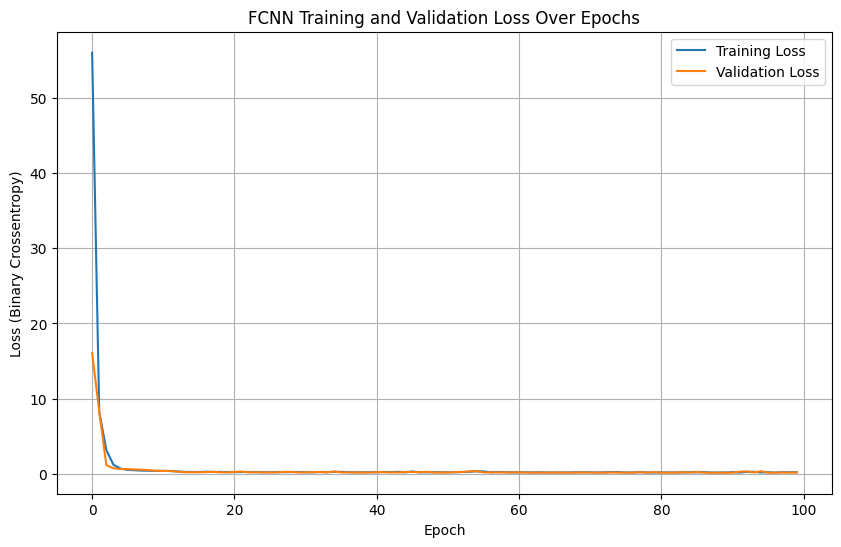

In [ ]:
metrics_list = []
metrics_list.append(report_metrics("FCNN", TestY1, FCNN_pred_Y))
metrics_list.append(report_metrics("Logistic Regression", TestY1, LR_pred_Y))
metrics_list.append(report_metrics("Support Vector Machine (SVM)", TestY1, SVM_pred_Y))

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('FCNN Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (Binary Crossentropy)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#3a

import time
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

INPUT_SHAPE = x_train.shape[1] * x_train.shape[2] * x_train.shape[3]

NUM_CLASSES = 10
y_train_encoded = to_categorical(y_train, NUM_CLASSES)
y_test_encoded = to_categorical(y_test, NUM_CLASSES)

print(f"Training data shape (before Flatten): {x_train.shape}")
print(f"Number of input features (after Flatten): {INPUT_SHAPE}")

NUM_CLASSES = 10
y_train_encoded = to_categorical(y_train, NUM_CLASSES)
y_test_encoded = to_categorical(y_test, NUM_CLASSES)

print(f"Training data shape (before Flatten): {x_train.shape}")
print(f"Number of input features (after Flatten): {INPUT_SHAPE}")

Training data shape (before Flatten): (50000, 32, 32, 3)
Number of input features (after Flatten): 3072
Training data shape (before Flatten): (50000, 32, 32, 3)
Number of input features (after Flatten): 3072


In [ ]:
class EpochMetricsCallback(Callback):
    """Keras callback to record metrics, including training time, after each epoch."""
    def on_train_begin(self, logs=None):
        self.epoch_times = []
        self.metrics_history = []
        self.start_time = time.time()
        print("\nEpoch | Train Loss | Train Acc | Epoch Time (s)")
        print("------|------------|-----------|------------------")

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs=None):
        epoch_time = time.time() - self.epoch_start_time
        self.epoch_times.append(epoch_time)

        self.metrics_history.append({
            'epoch': epoch + 1,
            'train_loss': logs.get('loss'),
            'train_acc': logs.get('accuracy'),
            'time': epoch_time
        })


        print(f" {epoch + 1:<4} | {logs.get('loss'):<10.4f} | {logs.get('accuracy'):<9.4f} | {epoch_time:<16.2f}")

In [ ]:
model = Sequential([Flatten(input_shape=x_train.shape[1:]), Dense(512, activation='relu'), Dense(NUM_CLASSES, activation='softmax')])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
EPOCHS = 20
BATCH_SIZE = 128
VALIDATION_SPLIT = 0.2

metrics_callback = EpochMetricsCallback()

total_train_start = time.time()
history = model.fit(x_train, y_train_encoded, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=VALIDATION_SPLIT, verbose=0, callbacks=[metrics_callback])
total_train_time = time.time() - total_train_start
print(f"Total Training Time: {total_train_time:.2f} seconds")


Epoch | Train Loss | Train Acc | Epoch Time (s)
------|------------|-----------|------------------
 1    | 0.3028     | 0.3040    | 12.45           
 2    | 0.2668     | 0.3861    | 10.33           
 3    | 0.2563     | 0.4127    | 11.35           
 4    | 0.2484     | 0.4356    | 11.03           
 5    | 0.2438     | 0.4490    | 11.58           
 6    | 0.2411     | 0.4564    | 20.37           
 7    | 0.2361     | 0.4708    | 11.04           
 8    | 0.2344     | 0.4719    | 20.42           
 9    | 0.2307     | 0.4872    | 11.09           
 10   | 0.2301     | 0.4882    | 11.05           
 11   | 0.2274     | 0.4949    | 21.33           
 12   | 0.2253     | 0.5009    | 11.65           
 13   | 0.2232     | 0.5078    | 19.89           
 14   | 0.2212     | 0.5118    | 11.50           
 15   | 0.2198     | 0.5181    | 20.48           
 16   | 0.2184     | 0.5198    | 19.90           
 17   | 0.2174     | 0.5239    | 11.45           
 18   | 0.2148     | 0.5311    | 10.99           


In [ ]:
#3b
model = Sequential([
    Flatten(input_shape=x_train.shape[1:]),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
EPOCHS = 300
BATCH_SIZE = 128
VALIDATION_SPLIT = 0.2

metrics_callback = EpochMetricsCallback()

total_train_start = time.time()
history = model.fit(x_train, y_train_encoded, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=VALIDATION_SPLIT, verbose=0, callbacks=[metrics_callback])
total_train_time = time.time() - total_train_start
print(f"Total Training Time: {total_train_time:.2f} seconds")


Epoch | Train Loss | Train Acc | Epoch Time (s)
------|------------|-----------|------------------
 1    | 0.2274     | 0.4726    | 14.52           
 2    | 0.2213     | 0.4918    | 18.72           
 3    | 0.2190     | 0.4970    | 12.34           
 4    | 0.2142     | 0.5098    | 13.25           
 5    | 0.2108     | 0.5178    | 19.55           
 6    | 0.2065     | 0.5301    | 20.49           
 7    | 0.2034     | 0.5371    | 20.45           
 8    | 0.2003     | 0.5481    | 12.46           
 9    | 0.1977     | 0.5529    | 12.40           
 10   | 0.1937     | 0.5620    | 13.22           
 11   | 0.1910     | 0.5708    | 13.13           
 12   | 0.1880     | 0.5792    | 13.54           
 13   | 0.1848     | 0.5863    | 12.35           
 14   | 0.1819     | 0.5956    | 20.44           
 15   | 0.1785     | 0.6029    | 12.29           
 16   | 0.1764     | 0.6086    | 13.06           
 17   | 0.1729     | 0.6179    | 12.73           
 18   | 0.1711     | 0.6214    | 12.35           
